In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# **Load Data**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ramsha275/ML_Datasets/main/ionosphere_data.csv')

In [4]:
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


# **Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.**

In [5]:
data.isnull().any()

feature1     False
feature2     False
feature3     False
feature4     False
feature5     False
feature6     False
feature7     False
feature8     False
feature9     False
feature10    False
feature11    False
feature12    False
feature13    False
feature14    False
feature15    False
feature16    False
feature17    False
feature18    False
feature19    False
feature20    False
feature21    False
feature22    False
feature23    False
feature24    False
feature25    False
feature26    False
feature27    False
feature28    False
feature29    False
feature30    False
feature31    False
feature32    False
feature33    False
feature34    False
label        False
dtype: bool

In [6]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
np.unique(data.feature2)

array([0], dtype=int64)

In [8]:
data.sample(frac=0.4)
data.drop(columns=["feature2"] ,inplace=True,axis=0)

# **Split into 60 and 40 ratio.**

In [9]:
labels = data.pop("label")

In [10]:
data -= data.mean()
data /= data.std()

In [11]:
labels = pd.Series([0 if lbl == 'g' else 1 for lbl in labels]) 

In [12]:
data_len = len(data)
train_data = data.iloc[:data_len*60//100]
test_data = data.iloc[data_len*60//100:]
labels_len = len(labels)
train_labels = labels.iloc[:labels_len*60//100]
test_labels = labels.iloc[labels_len*60//100:]

# **Model : 1 hidden layers including 16 unit.  Train the Model with Epochs (100).**

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network = models.Sequential()
network.add(layers.Dense(16,activation="relu",input_shape=(len(train_data.columns),)))
# network.add(layers.Dense(13,activation="relu"))
network.add(layers.Dropout(0.5))

network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
with tf.device('/device:GPU:1'):
  %time MODEL = network.fit(train_data,train_labels,epochs=100,batch_size=128)

Epoch 1/100
2/2 [==============================] - 2s 10ms/step - loss: 1.0568 - acc: 0.4451
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 1.0511 - acc: 0.4035
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 1.1009 - acc: 0.4197
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 0.9838 - acc: 0.4396
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 1.0188 - acc: 0.4376
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.9041 - acc: 0.4705
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8619 - acc: 0.5332
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 0.8268 - acc: 0.5685
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 0.9014 - acc: 0.5257
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 0.8969 - acc: 0.5110
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 0.77

# **Evaluation Step**

In [14]:
loss , acc = network.evaluate(test_data,test_labels)

5/5 [==============================] - 0s 2ms/step - loss: 0.3784 - acc: 0.8794


# **Prediction**

In [15]:
prediction_test_data = test_data[test_labels == 1]
predictions = network.predict(prediction_test_data)
len(np.round(predictions))

22

# **Model : 2 hidden layers including 33 and 13 unit.  Train the Model with Epochs (80).**

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
network1 = models.Sequential()
network1.add(layers.Dense(33,activation="relu",input_shape=(len(train_data.columns),)))
network1.add(layers.Dense(13,activation="relu"))
network1.add(layers.Dense(1,activation="sigmoid"))
network1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
with tf.device('/device:GPU:1'):
  %time MODEL1 = network1.fit(train_data,train_labels, validation_split=0.,epochs=80,batch_size=64)

Epoch 1/80
4/4 [==============================] - 1s 3ms/step - loss: 0.8392 - acc: 0.5735
Epoch 2/80
4/4 [==============================] - 0s 4ms/step - loss: 0.6798 - acc: 0.6701
Epoch 3/80
4/4 [==============================] - 0s 7ms/step - loss: 0.6234 - acc: 0.6910
Epoch 4/80
4/4 [==============================] - 0s 5ms/step - loss: 0.5763 - acc: 0.7213
Epoch 5/80
4/4 [==============================] - 0s 5ms/step - loss: 0.5195 - acc: 0.7780
Epoch 6/80
4/4 [==============================] - 0s 4ms/step - loss: 0.4963 - acc: 0.7690
Epoch 7/80
4/4 [==============================] - 0s 5ms/step - loss: 0.4667 - acc: 0.7976
Epoch 8/80
4/4 [==============================] - 0s 6ms/step - loss: 0.4425 - acc: 0.8215
Epoch 9/80
4/4 [==============================] - 0s 7ms/step - loss: 0.3937 - acc: 0.8597
Epoch 10/80
4/4 [==============================] - 0s 7ms/step - loss: 0.4008 - acc: 0.8278
Epoch 11/80
4/4 [==============================] - 0s 7ms/step - loss: 0.3788 - acc: 0.84

# **Training loss visualization**

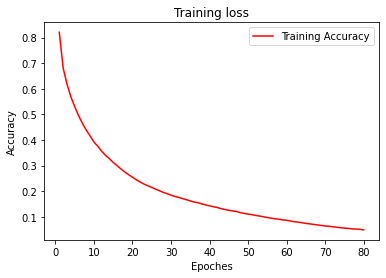

In [17]:
history_dict = MODEL1.history
acc_values = history_dict['loss']
epoches = np.arange(1,len(history_dict['acc'])+1)
plt.plot(epoches,acc_values,'r',label="Training Accuracy")
plt.title('Training loss')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **Evaluation Step**

In [18]:
loss , acc = network1.evaluate(test_data,test_labels)

5/5 [==============================] - 0s 3ms/step - loss: 0.0767 - acc: 0.9716


# **Predictions**

In [19]:
prediction_test_data = test_data
predictions = network1.predict(prediction_test_data)

In [20]:
print(f"Fanally Alhumdullah i got accuracy upto {acc*100}%")

Fanally Alhumdullah i got accuracy upto 97.16312289237976%


In [21]:
predictions = np.round(predictions)
test_labels2 = test_labels

In [22]:
tf.math.confusion_matrix(
    test_labels2, predictions, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[116,   3],
       [  1,  21]])>